In [1]:
import matplotlib.pyplot as plt
from wasteoptimiser.api import api
from shapely.geometry import Polygon
from wasteoptimiser.logger.logger import Logger
logger = Logger("logs", Logger.logLevel.WARNING, Logger.logLevel.DEBUG)
wapi = api.Api(logger)

In [2]:
wapi.settings.input_path = "D:\Ondra\Stuff\OneDrive\VUT\DP\moje\gcode"
wapi.getGcodes()

['1-ctverec.gcode',
 '2-drzak.gcode',
 '3-ctverec_obly.gcode',
 '4-hvezda.gcode',
 '5-trojuhelnik.prg',
 '6-drzak_2.nc',
 'dick.nc',
 'pokus_obly.nc',
 'pokus_obly_2.nc',
 'pokus_obly_3.nc',
 'U.nc',
 'warning1.txt']

In [28]:
def setup_shape_set_1():
    wapi.constructShapeList(wapi.settings.input_path)
    wapi.setShapeCount('1-ctverec.gcode', 7)
    wapi.setShapeCount('2-drzak.gcode', 7)
    wapi.setShapeCount('5-trojuhelnik.prg', 7)
    wapi.setShapeCount('4-hvezda.gcode', 7)
    wapi.setShapeCount('U.nc', 3)
    wapi.setShapeConvex('U.nc', False)
    wapi.getAllShapesCount()
    
def setup_shape_set_2():
    wapi.constructShapeList(wapi.settings.input_path)
    wapi.setShapeCount('3-ctverec_obly.gcode', 4)
    wapi.setShapeCount('2-drzak.gcode', 6)
    wapi.setShapeCount('5-trojuhelnik.prg', 5)
    wapi.setShapeCount('6-drzak_2.nc', 7)
    wapi.setShapeConvex('6-drzak_2.nc', False)
    wapi.setShapeCount('U.nc', 5)
    wapi.setShapeConvex('U.nc', False)
    wapi.getAllShapesCount()
    
setup_shape_set_2()
wapi.getAllShapesCount()

6-drzak_2.nc convex: False
U.nc convex: False


27

U.nc convex: False
3-ctverec_obly.gcode placed ( 1 / 7 )
3-ctverec_obly.gcode placed ( 2 / 7 )
3-ctverec_obly.gcode placed ( 3 / 7 )
2-drzak.gcode placed ( 4 / 7 )
2-drzak.gcode placed ( 5 / 7 )
2-drzak.gcode placed ( 6 / 7 )
2-drzak.gcode placed ( 7 / 7 )
0.4674572185904888


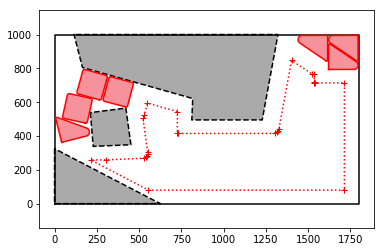

In [26]:
# rotations: 2, 8
# local: true/false
def calc_fitness(board, holes, startps):
    barea = Polygon(board).area
    for h in holes:
        barea -= Polygon(h).area

    sarea = 0
    for sp in startps:
        sarea += Polygon(sp).area
    
    return sarea/barea

def rerun_optimiser(nfp, rotations, local, workspace='../test3.json', prefpos=4):
    wapi.optimiser.__init__(logger)
    wapi.loadWorkspace(workspace)
    wapi.optimiser.hole_offset = 5
    wapi.optimiser.edge_offset = 5
    wapi.optimiser.angle = 0
    wapi.settings.nfp_rotations = rotations
    wapi.settings.local_optimisation = local
    wapi.settings.use_nfp = nfp
    wapi.optimiser.preffered_pos = prefpos
    wapi.placeAllSelectedShapes()
    #wapi.optimiser.getShapeNamesPositions()
    
    class ret:
        geom = []
        fitness = 0
    
    ret.geom.append(wapi.optimiser.getBoardShape())
    ret.geom.append(wapi.optimiser.getHoles(htype='holes'))
    ret.geom.append(wapi.optimiser.getHoles(htype='shapes'))
    
    wapi.optimiser.initStartpoly(nfp)
    sp = wapi.optimiser.getStartpoly()
    
    ret.fitness = calc_fitness(ret.geom[0], ret.geom[1], sp)
    
    return ret

def draw_board(board, holes, shapes):
    plt.plot(*zip(*board), '-k')
    plt.axis('equal')

    for hole in holes:
        plt.fill(*zip(*hole), '#aaaaaa')
        plt.plot(*zip(*hole), '--k')

    for shape in shapes:
        plt.fill(*zip(*shape), '#f6929c')
        plt.plot(*zip(*shape), '-r')
        

wapi.constructShapeList(wapi.settings.input_path)
wapi.setShapeCount('3-ctverec_obly.gcode', 3)
wapi.setShapeCount('2-drzak.gcode', 4)
wapi.setShapeCount('5-trojuhelnik.prg', 0)
wapi.setShapeCount('4-hvezda.gcode', 0)
wapi.setShapeCount('U.nc', 0)
wapi.setShapeConvex('U.nc', False)



ret = rerun_optimiser(True, 2, True, prefpos=1)

print(ret.fitness)
draw_board(*ret.geom)

wapi.optimiser.initStartpoly(True)
sp = wapi.optimiser.getStartpoly()

for s in sp:
    plt.plot(*zip(*s), '+:r')

plt.savefig("demo.svg")

U.nc convex: False
benching  [False, 1, False]
U.nc placed ( 1 / 31 )
U.nc placed ( 2 / 31 )
U.nc placed ( 3 / 31 )
1-ctverec.gcode placed ( 4 / 31 )
1-ctverec.gcode placed ( 5 / 31 )
1-ctverec.gcode placed ( 6 / 31 )
1-ctverec.gcode placed ( 7 / 31 )
1-ctverec.gcode placed ( 8 / 31 )
1-ctverec.gcode placed ( 9 / 31 )
1-ctverec.gcode placed ( 10 / 31 )
2-drzak.gcode placed ( 11 / 31 )
2-drzak.gcode placed ( 12 / 31 )
2-drzak.gcode placed ( 13 / 31 )
2-drzak.gcode placed ( 14 / 31 )
2-drzak.gcode placed ( 15 / 31 )
2-drzak.gcode placed ( 16 / 31 )
2-drzak.gcode placed ( 17 / 31 )
5-trojuhelnik.prg placed ( 18 / 31 )
5-trojuhelnik.prg placed ( 19 / 31 )
5-trojuhelnik.prg placed ( 20 / 31 )
5-trojuhelnik.prg placed ( 21 / 31 )
5-trojuhelnik.prg placed ( 22 / 31 )
5-trojuhelnik.prg placed ( 23 / 31 )
5-trojuhelnik.prg placed ( 24 / 31 )
4-hvezda.gcode placed ( 25 / 31 )
4-hvezda.gcode placed ( 26 / 31 )
4-hvezda.gcode placed ( 27 / 31 )
4-hvezda.gcode placed ( 28 / 31 )
4-hvezda.gcode plac

5-trojuhelnik.prg placed ( 23 / 31 )
5-trojuhelnik.prg placed ( 24 / 31 )
4-hvezda.gcode placed ( 25 / 31 )
4-hvezda.gcode placed ( 26 / 31 )
4-hvezda.gcode placed ( 27 / 31 )
4-hvezda.gcode placed ( 28 / 31 )
4-hvezda.gcode placed ( 29 / 31 )
4-hvezda.gcode placed ( 30 / 31 )
4-hvezda.gcode placed ( 31 / 31 )
benching  [True, 2, True]
U.nc placed ( 1 / 31 )
U.nc placed ( 2 / 31 )
U.nc placed ( 3 / 31 )
1-ctverec.gcode placed ( 4 / 31 )
1-ctverec.gcode placed ( 5 / 31 )
1-ctverec.gcode placed ( 6 / 31 )
1-ctverec.gcode placed ( 7 / 31 )
1-ctverec.gcode placed ( 8 / 31 )
1-ctverec.gcode placed ( 9 / 31 )
1-ctverec.gcode placed ( 10 / 31 )
2-drzak.gcode placed ( 11 / 31 )
2-drzak.gcode placed ( 12 / 31 )
2-drzak.gcode placed ( 13 / 31 )
2-drzak.gcode placed ( 14 / 31 )
2-drzak.gcode placed ( 15 / 31 )
2-drzak.gcode placed ( 16 / 31 )
2-drzak.gcode placed ( 17 / 31 )
5-trojuhelnik.prg placed ( 18 / 31 )
5-trojuhelnik.prg placed ( 19 / 31 )
5-trojuhelnik.prg placed ( 20 / 31 )
5-trojuhelni

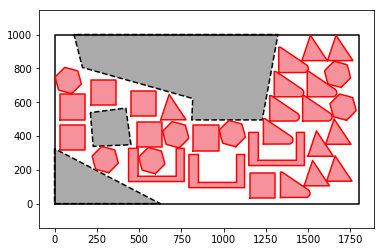

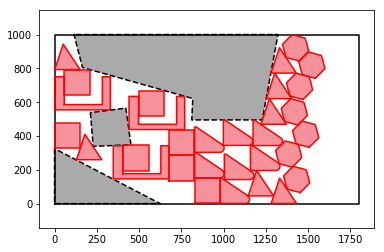

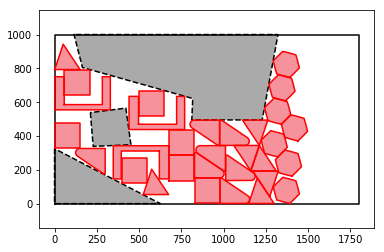

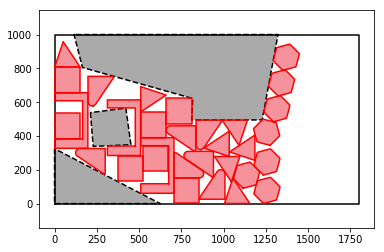

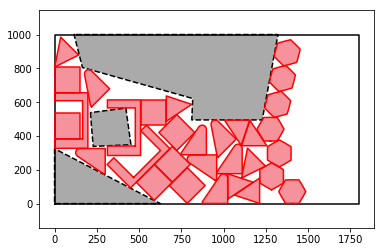

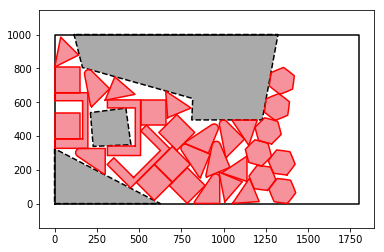

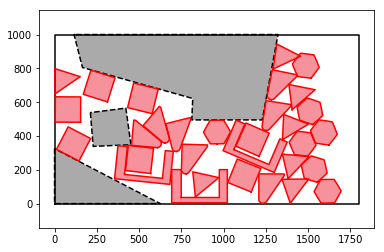

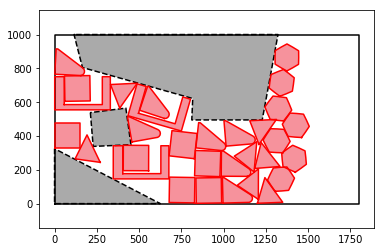

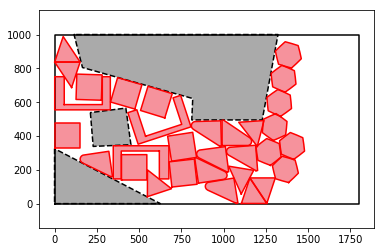

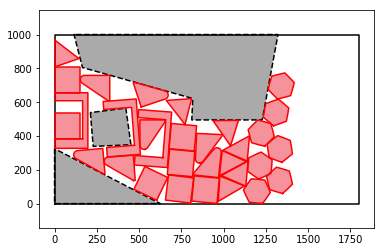

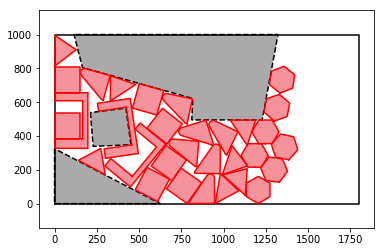

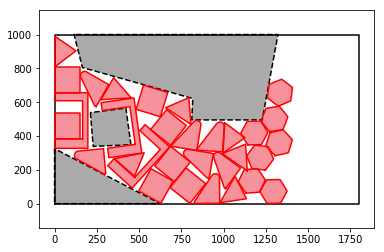

In [18]:
from collections import defaultdict
import time

def export_fig_case(b, name='0'):
    plt.figure()
    draw_board(*b.board)
    plt.savefig('benchmarks/case_'+name+'_'+str(b.case)+'.svg')

class bench:
    case = []
    board = []
    fitness = 0
    time = 0

nfp_variants = [
    [False, 1],
    [True, 1],
    [True, 2],
    [True, 4],
    [True, 8],
    [True, 16],
]

wscases = ['../empty.json', '../test3.json']

cases = defaultdict()
setup_shape_set_1()
benchs = []
for local in [False, True]:
    for nfp_v in nfp_variants:
        b = bench()
        b.case = [*nfp_v, local]
        print("benching ", b.case)
        
        start = time.time()
        opt = rerun_optimiser(*b.case, prefpos=4)
        end = time.time()
        
        b.board = opt.geom
        b.fitness = opt.fitness
        b.time = end-start
        benchs.append(b)
             
for b in benchs:
    print(b.case, b.fitness, b.time)
    export_fig_case(b, 'xxx')


[False, 1, False] 0.0013452481756243155 0.4637596607208252
[True, 1, False] 0.08092176394476672 0.8537178039550781
[True, 2, False] 0.1408421312860604 1.2366936206817627
[True, 4, False] 0.19090418409439783 2.150278329849243
[True, 8, False] 0.16363392897774842 3.8925976753234863
[True, 16, False] 0.17968058093471528 7.470999717712402
[False, 1, True] 0.029364675905954297 7.966717720031738
[True, 1, True] 0.1335112191392379 7.361291885375977
[True, 2, True] 0.1507883011837043 7.634614944458008
[True, 4, True] 0.18180737506939576 8.547120094299316
[True, 8, True] 0.17737548356286098 10.474996089935303
[True, 16, True] 0.19521326633858926 14.163198471069336


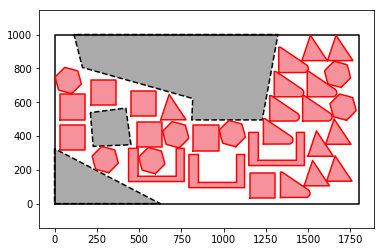

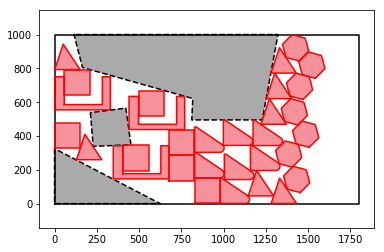

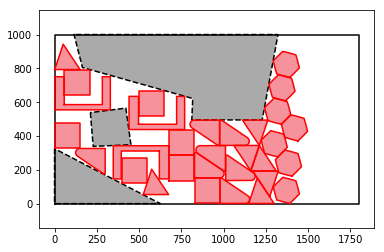

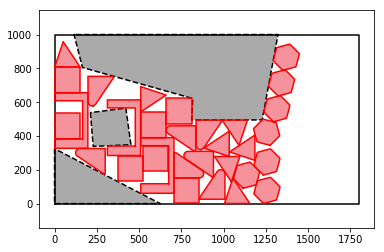

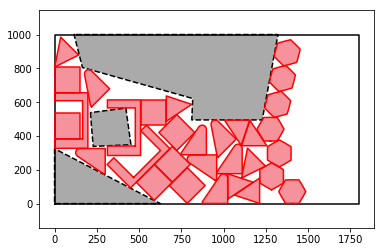

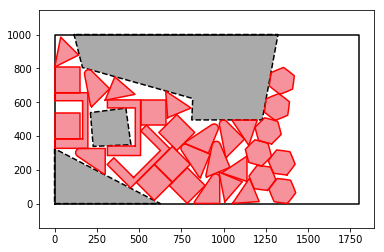

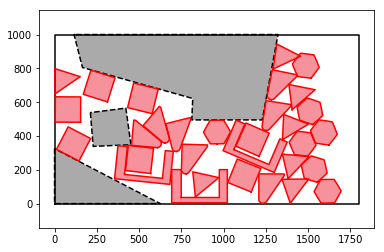

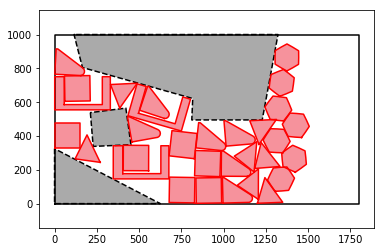

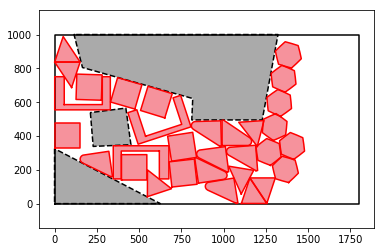

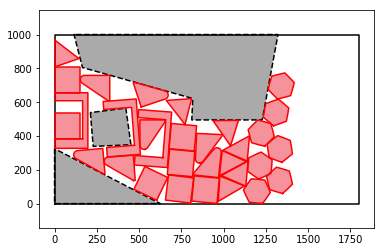

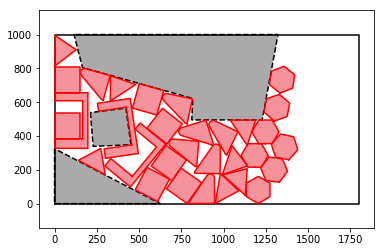

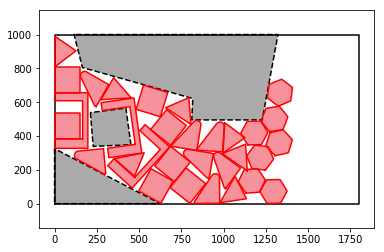

In [20]:
for b in benchs:
    print(b.case, b.fitness, b.time)
    export_fig_case(b, '2')

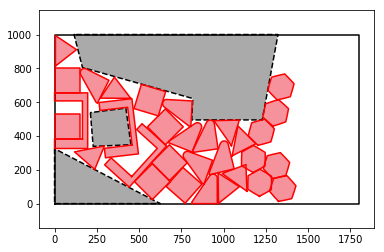

In [46]:


export_fig_case(benchs[9])

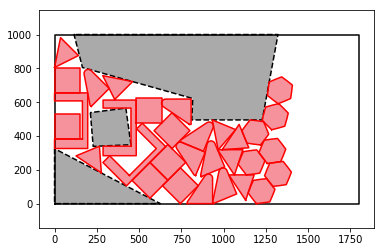

In [14]:

shapes = wapi.optimiser.getHoles(htype='shapes')
holes = wapi.optimiser.getHoles(htype='holes')
plt.plot(*zip(*wapi.optimiser.getBoardShape()), '-k')
plt.axis('equal')

for hole in holes:
    plt.fill(*zip(*hole), '#aaaaaa')
    plt.plot(*zip(*hole), '--k')

for shape in shapes:
    plt.fill(*zip(*shape), '#f6929c')
    plt.plot(*zip(*shape), '-r')

6-drzak_2.nc convex: False
U.nc convex: False
6-drzak_2.nc convex: False
benching  [True, 2, False, False]
U.nc placed ( 1 / 27 )
U.nc placed ( 2 / 27 )
U.nc placed ( 3 / 27 )
U.nc placed ( 4 / 27 )
U.nc placed ( 5 / 27 )
3-ctverec_obly.gcode placed ( 6 / 27 )
3-ctverec_obly.gcode placed ( 7 / 27 )
3-ctverec_obly.gcode placed ( 8 / 27 )
3-ctverec_obly.gcode placed ( 9 / 27 )
2-drzak.gcode placed ( 10 / 27 )
2-drzak.gcode placed ( 11 / 27 )
2-drzak.gcode placed ( 12 / 27 )
2-drzak.gcode placed ( 13 / 27 )
2-drzak.gcode placed ( 14 / 27 )
2-drzak.gcode placed ( 15 / 27 )
6-drzak_2.nc placed ( 16 / 27 )
6-drzak_2.nc placed ( 17 / 27 )
6-drzak_2.nc placed ( 18 / 27 )
6-drzak_2.nc placed ( 19 / 27 )
6-drzak_2.nc placed ( 20 / 27 )
6-drzak_2.nc placed ( 21 / 27 )
6-drzak_2.nc placed ( 22 / 27 )
5-trojuhelnik.prg placed ( 23 / 27 )
5-trojuhelnik.prg placed ( 24 / 27 )
5-trojuhelnik.prg placed ( 25 / 27 )
5-trojuhelnik.prg placed ( 26 / 27 )
5-trojuhelnik.prg placed ( 27 / 27 )
benching  [True

2-drzak.gcode placed ( 15 / 27 )
6-drzak_2.nc placed ( 16 / 27 )
6-drzak_2.nc placed ( 17 / 27 )
6-drzak_2.nc placed ( 18 / 27 )
6-drzak_2.nc placed ( 19 / 27 )
6-drzak_2.nc placed ( 20 / 27 )
6-drzak_2.nc placed ( 21 / 27 )
6-drzak_2.nc placed ( 22 / 27 )
5-trojuhelnik.prg placed ( 23 / 27 )
5-trojuhelnik.prg placed ( 24 / 27 )
5-trojuhelnik.prg placed ( 25 / 27 )
5-trojuhelnik.prg placed ( 26 / 27 )
5-trojuhelnik.prg placed ( 27 / 27 )
benching  [True, 4, False, True]
U.nc placed ( 1 / 27 )
U.nc placed ( 2 / 27 )
U.nc placed ( 3 / 27 )
U.nc placed ( 4 / 27 )
U.nc placed ( 5 / 27 )
3-ctverec_obly.gcode placed ( 6 / 27 )
3-ctverec_obly.gcode placed ( 7 / 27 )
3-ctverec_obly.gcode placed ( 8 / 27 )
3-ctverec_obly.gcode placed ( 9 / 27 )
2-drzak.gcode placed ( 10 / 27 )
2-drzak.gcode placed ( 11 / 27 )
2-drzak.gcode placed ( 12 / 27 )
2-drzak.gcode placed ( 13 / 27 )
2-drzak.gcode placed ( 14 / 27 )
2-drzak.gcode placed ( 15 / 27 )
6-drzak_2.nc placed ( 16 / 27 )
6-drzak_2.nc placed ( 17

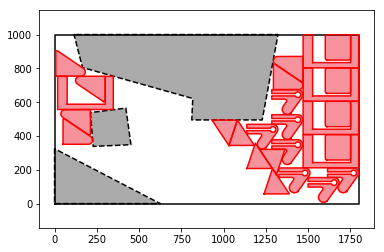

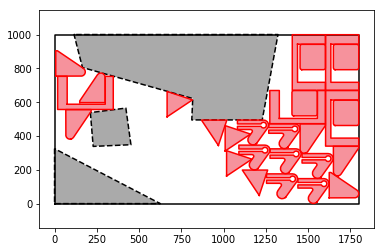

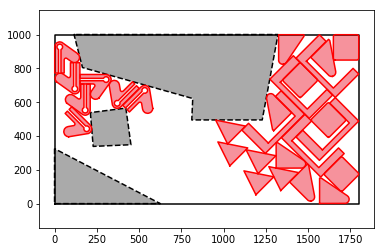

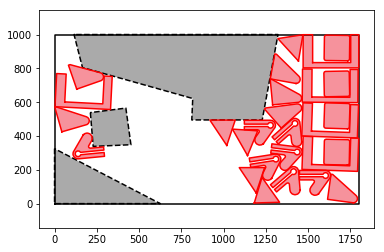

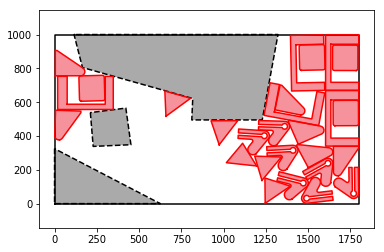

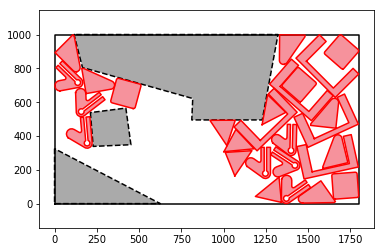

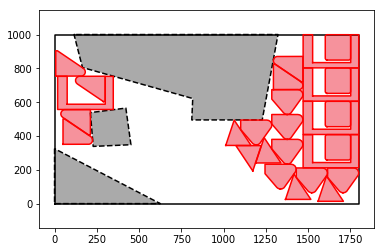

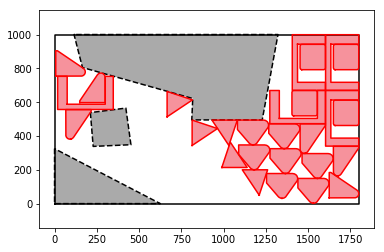

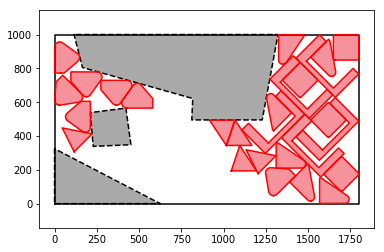

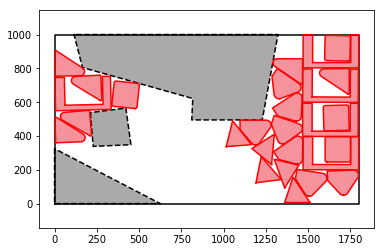

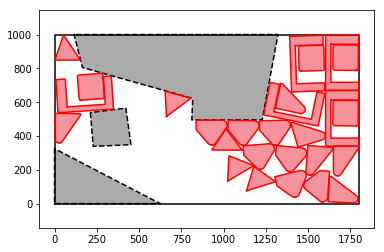

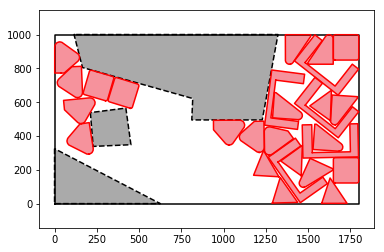

In [21]:
from collections import defaultdict
import time

def export_fig_case(b, name='0'):
    plt.figure()
    draw_board(*b.board)
    plt.savefig('benchmarks/case_'+name+'_'+str(b.case)+'.svg')

class bench:
    case = []
    board = []
    fitness = 0
    time = 0

nfp_variants = [
    [True, 2],
    [True, 4],
    [True, 8],
]

wscases = ['../empty.json', '../test3.json']

cases = defaultdict()
benchs2 = []
for convex in [False, True]:
    setup_shape_set_2()
    wapi.setShapeConvex('6-drzak_2.nc', convex)

    for local in [False, True]:
        for nfp_v in nfp_variants:
            b = bench()
            b.case = [*nfp_v, local, convex]
            print("benching ", b.case)

            start = time.time()
            opt = rerun_optimiser(*b.case[:3],prefpos=1)
            end = time.time()

            b.board = opt.geom
            b.fitness = opt.fitness
            b.time = end-start
            benchs2.append(b)
             
for b in benchs2:
    print(b.case, b.fitness, b.time)
    export_fig_case(b, '2')


[((0, 0), (1800, 0), (1800, 1000), (0, 1000), (0, 0)),
 [[(0.0, 325.0607427976397),
   (0.0, 0.0),
   (625.0433877125997, 0.0),
   (0.0, 325.0607427976397)],
  [(211.8535230822631, 538.320027768136),
   (228.51440472058312, 338.3894481082957),
   (451.77021867407143, 348.38597709128777),
   (421.7806317250954, 564.977438389448),
   (211.8535230822631, 538.320027768136)],
  [(121.88476223533496, 1000.0),
   (115.22040958000696, 1000.0),
   (165.20305449496698, 804.8941339812565),
   (817.2759713913902, 621.6926954246424),
   (811.645262061784, 495.00173550850394),
   (1228.1673030197846, 495.00173550850394),
   (1321.468240194377, 1000.0),
   (285.16140229087125, 1000.0),
   (121.88476223533496, 1000.0)]],
 [[(0.0, 326.0), (0.0, 476.0), (150.0, 476.0), (150.0, 326.0), (0.0, 326.0)],
  [(0.0, 476.0), (0.0, 626.0), (150.0, 626.0), (150.0, 476.0), (0.0, 476.0)],
  [(0.0, 626.0), (0.0, 776.0), (150.0, 776.0), (150.0, 626.0), (0.0, 626.0)],
  [(150.0, 549.8229665071771),
   (150.0, 699.82296